In [710]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import os
os.environ["KERAS_BACKEND"] = "torch"
import keras
from keras import Sequential # sequential model: https://keras.io/guides/sequential_model/
from keras.layers import Dense, Dropout, Input
from keras.regularizers import l2

Read the data

In [689]:
df1 = pd.read_csv("FINAL1.csv")
df2 = pd.read_csv("FINAL2.csv")

In [690]:
df1["total minutes of parking"].describe()

count    16992.000000
mean       651.355695
std       1103.619648
min          0.000000
25%          0.000000
50%         60.000000
75%        708.333333
max       3120.000000
Name: total minutes of parking, dtype: float64

In [691]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16992 entries, 0 to 16991
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   datetime                  16992 non-null  object 
 1   hour                      16992 non-null  int64  
 2   weekday                   16992 non-null  int64  
 3   dayOfMonth                16992 non-null  int64  
 4   month                     16992 non-null  int64  
 5   year                      16992 non-null  int64  
 6   total number of sessions  16992 non-null  int64  
 7   total minutes of parking  16992 non-null  float64
 8   temperature               16992 non-null  float64
 9   cloud_cover               16992 non-null  float64
 10  pressure                  16992 non-null  float64
 11  windspeed                 16992 non-null  float64
 12  precipitation             16992 non-null  float64
dtypes: float64(6), int64(6), object(1)
memory usage: 1.7+ MB


Since we dont need datetime for the prediction and dont know the total number of sessions, we remove the columns

In [692]:
df1 = df1.drop("datetime", axis=1)
df2 = df2.drop("datetime", axis=1)
df1 = df1.drop("total number of sessions", axis=1)
df2 = df2.drop("total number of sessions", axis=1)
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16992 entries, 0 to 16991
Data columns (total 11 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   hour                      16992 non-null  int64  
 1   weekday                   16992 non-null  int64  
 2   dayOfMonth                16992 non-null  int64  
 3   month                     16992 non-null  int64  
 4   year                      16992 non-null  int64  
 5   total minutes of parking  16992 non-null  float64
 6   temperature               16992 non-null  float64
 7   cloud_cover               16992 non-null  float64
 8   pressure                  16992 non-null  float64
 9   windspeed                 16992 non-null  float64
 10  precipitation             16992 non-null  float64
dtypes: float64(6), int64(5)
memory usage: 1.4 MB


Extracting the feature we want to predict and then we split into train, validation and test set. For now only one for transparency reasons

In [693]:
# define x and Y
y = df1["total minutes of parking"]
y = pd.DataFrame(y)
X = df1.drop("total minutes of parking", axis=1)

Split the data into training, holdout and test set.

In [694]:
# Conduct train test split
from sklearn.model_selection import train_test_split

# First, split the data into training+validation and test sets
X_train_val, X_test, y_train_val, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Next, split the training+validation set into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size=0.25, random_state=42)


X_train, y_train = 60% = training set

X_val, y_val     = 20% = validation set

X_test, y_test   = 20% = test set

Now we scale the training, validation and test sets

In [695]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)

X_train_scaled = scaler.transform(X_train)
X_val_scaled = scaler.transform(X_val)
X_test_scaled = scaler.transform(X_test)

Next we build the sequential NN

In [696]:
neuralnetwork = Sequential()

neuralnetwork.add(Input(shape=(10,)))
neuralnetwork.add(Dense(89, activation="relu", kernel_regularizer=l2(0.004)))
neuralnetwork.add(Dropout(0.055))
neuralnetwork.add(Dense(89, activation="relu", kernel_regularizer=l2(0.004)))
neuralnetwork.add(Dropout(0.055))
neuralnetwork.add(Dense(89, activation="relu", kernel_regularizer=l2(0.004)))
neuralnetwork.add(Dropout(0.055))
neuralnetwork.add(Dense(89, activation="relu", kernel_regularizer=l2(0.004)))
neuralnetwork.add(Dropout(0.055))
neuralnetwork.add(Dense(89, activation="relu", kernel_regularizer=l2(0.004)))
neuralnetwork.add(Dropout(0.055))
neuralnetwork.add(Dense(1))

Comile the model

In [697]:
neuralnetwork.compile(loss='mse',
             optimizer="adam",
             metrics=["mae", "mse"])

Fitting/Training the NN

In [699]:
history = neuralnetwork.fit(X_train_scaled, y_train,
                            validation_data=(X_val_scaled, y_val),  # Pass validation data
                            epochs=81,
                            batch_size=30)

Epoch 1/81
340/340 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - loss: 1192360.2500 - mae: 674.8873 - mse: 1192358.6250 - val_loss: 574677.3750 - val_mae: 498.0604 - val_mse: 574674.9375
Epoch 2/81
340/340 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - loss: 547158.9375 - mae: 472.9348 - mse: 547156.7500 - val_loss: 437591.6562 - val_mae: 388.9050 - val_mse: 437589.0938
Epoch 3/81
340/340 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - loss: 413766.0312 - mae: 376.8868 - mse: 413763.5000 - val_loss: 356405.2188 - val_mae: 335.0627 - val_mse: 356402.3125
Epoch 4/81
340/340 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - loss: 366416.4688 - mae: 339.2317 - mse: 366413.5625 - val_loss: 264373.5625 - val_mae: 274.1067 - val_mse: 264370.4688
Epoch 5/81
340/340 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - loss: 298530.1875 - mae: 296.9630 - mse: 298526.9375 - val_loss: 245922.1406 - val_mae: 280.8035 - val_mse: 245918.6094
Epoch 6/81
340/340 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - loss: 262187.7188 - mae: 276.2281 - mse: 262184.1562 - val_loss: 212258.73

In [700]:
history_df = pd.DataFrame(history.history)
history_df

,loss,mae,mse,val_loss,val_mae,val_mse
0,872633.000000,616.222534,872631.250000,574677.375000,498.060425,574674.937500
1,517934.406250,447.373657,517931.937500,437591.656250,388.904999,437589.093750
2,412137.687500,374.597412,412135.187500,356405.218750,335.062744,356402.312500
3,340217.125000,326.043274,340214.218750,264373.562500,274.106720,264370.468750
4,290257.781250,291.791016,290254.437500,245922.140625,280.803467,245918.609375
...,...,...,...,...,...,...
76,64483.578125,127.869606,64471.058594,75833.046875,121.876022,75820.460938
77,69346.437500,132.817108,69333.820312,81270.210938,128.617615,81257.500000
78,69534.406250,131.250275,69521.640625,72610.500000,117.879623,72597.640625
79,70333.171875,133.246521,70320.242188,85626.687500,124.823502,85613.765625


In [701]:
root_metrics_df = history_df[["mse", "val_mse"]].apply(np.sqrt)
root_metrics_df.rename({"mse":"rmse", "val_mse":"val_rmse"}, axis=1, inplace=True)
root_metrics_df

,rmse,val_rmse
0,934.147338,758.073174
1,719.674883,661.505173
2,641.977560,596.994399
3,583.278852,514.169689
4,538.752668,495.901814
...,...,...
76,253.911517,275.355154
77,263.313160,285.057012
78,263.669567,269.439493
79,265.179641,292.598301


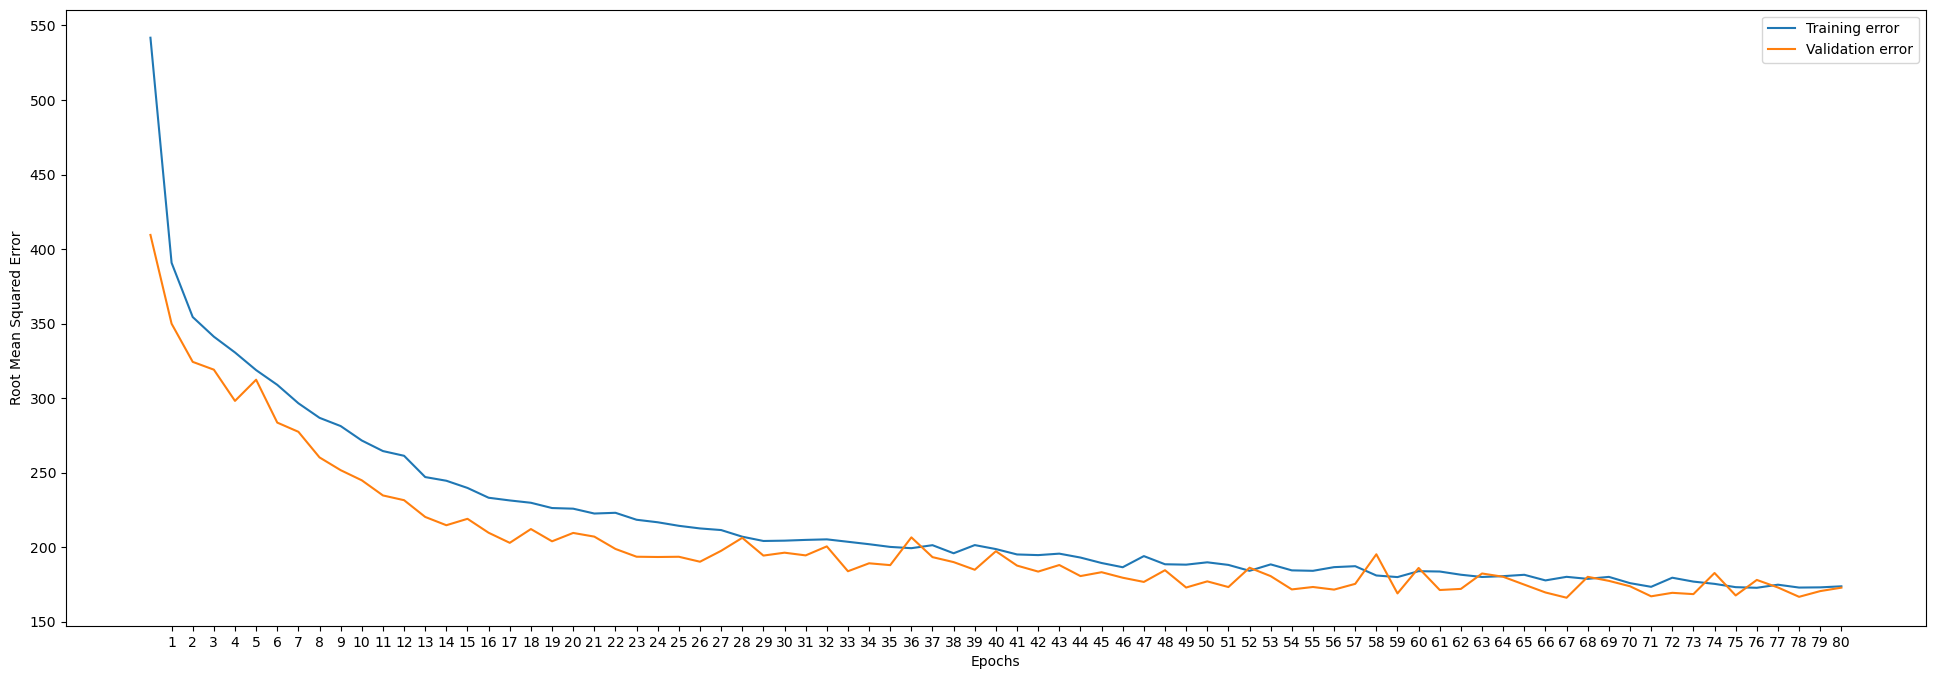

In [716]:
plt.Figure(figsize=(14,6), dpi=100)

plt.plot(root_metrics_df["rmse"], label = 'Training error')
plt.plot(root_metrics_df["val_rmse"], label = 'Validation error')

plt.xlabel("Epochs")
plt.ylabel("Root Mean Squared Error")

# plt.xlim([0, epochs])
plt.xticks(range(1,81))
plt.legend()
plt.gcf().set_size_inches(24, 8)
plt.show()

Prediction on test set

In [703]:
y_pred = neuralnetwork.predict(X_test_scaled)

107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step


In [704]:
from sklearn.metrics import mean_squared_error, mean_absolute_error


print("Test RMSE: ", np.sqrt(mean_squared_error(y_test, y_pred)))
print("Test MAE: ", mean_absolute_error(y_test, y_pred))

Test RMSE:  269.25242747606006
Test MAE:  120.48386724131052


With domain knowledge, this MAE is actually really good, if calculated down to percentages, its a 5% mean error.

Now for Site 2. Since we already have all the Code and explained it above, we just condense it.

In [707]:
# define x and Y
y = df2["total minutes of parking"]
y = pd.DataFrame(y)
X = df2.drop("total minutes of parking", axis=1)

# Conduct train test split
from sklearn.model_selection import train_test_split

# First, split the data into training+validation and test sets
X_train_val, X_test, y_train_val, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Next, split the training+validation set into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size=0.25, random_state=42)  # 0.25 x 0.8 = 0.2

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)

# Scale training, validation, and test sets
X_train_scaled = scaler.transform(X_train)
X_val_scaled = scaler.transform(X_val)
X_test_scaled = scaler.transform(X_test)

neuralnetwork2 = Sequential()

neuralnetwork2.add(Input(shape=(10,)))
neuralnetwork2.add(Dense(89, activation="relu", kernel_regularizer=l2(0.004)))
neuralnetwork2.add(Dropout(0.055))
neuralnetwork2.add(Dense(89, activation="relu", kernel_regularizer=l2(0.004)))
neuralnetwork2.add(Dropout(0.055))
neuralnetwork2.add(Dense(89, activation="relu", kernel_regularizer=l2(0.004)))
neuralnetwork2.add(Dropout(0.055))
neuralnetwork2.add(Dense(89, activation="relu", kernel_regularizer=l2(0.004)))
neuralnetwork2.add(Dropout(0.055))
neuralnetwork2.add(Dense(89, activation="relu", kernel_regularizer=l2(0.004)))
neuralnetwork2.add(Dropout(0.055))
neuralnetwork2.add(Dense(1))

neuralnetwork2.compile(loss='mse',
             optimizer="adam",
             metrics=["mae", "mse"])

Do the model training extra, so that it is executable separatly, as it produces live output data

In [708]:
history = neuralnetwork2.fit(X_train_scaled, y_train,
                            validation_data=(X_val_scaled, y_val),  # Pass validation data
                            epochs=81,
                            batch_size=30)

Epoch 1/81
340/340 ━━━━━━━━━━━━━━━━━━━━ 4s 11ms/step - loss: 456519.5000 - mae: 454.1828 - mse: 456517.8750 - val_loss: 167665.2969 - val_mae: 279.2880 - val_mse: 167663.4688
Epoch 2/81
340/340 ━━━━━━━━━━━━━━━━━━━━ 4s 10ms/step - loss: 160194.9531 - mae: 274.7525 - mse: 160193.0938 - val_loss: 122447.2812 - val_mae: 229.0787 - val_mse: 122445.1953
Epoch 3/81
340/340 ━━━━━━━━━━━━━━━━━━━━ 4s 10ms/step - loss: 131471.3281 - mae: 238.6151 - mse: 131469.1719 - val_loss: 105177.7500 - val_mae: 215.8298 - val_mse: 105175.4453
Epoch 4/81
340/340 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step - loss: 122875.1406 - mae: 228.6148 - mse: 122872.8047 - val_loss: 101808.4531 - val_mae: 206.2351 - val_mse: 101805.9219
Epoch 5/81
340/340 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step - loss: 109283.6875 - mae: 216.1639 - mse: 109281.1250 - val_loss: 88876.7500 - val_mae: 194.3663 - val_mse: 88874.0703
Epoch 6/81
340/340 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step - loss: 102871.0703 - mae: 208.7764 - mse: 102868.3281 - val_loss: 97552.4

In [709]:
history_df = pd.DataFrame(history.history)
root_metrics_df = history_df[["mse", "val_mse"]].apply(np.sqrt)
root_metrics_df.rename({"mse":"rmse", "val_mse":"val_rmse"}, axis=1, inplace=True)
y_pred = neuralnetwork2.predict(X_test_scaled)
from sklearn.metrics import mean_squared_error, mean_absolute_error
print("Test RMSE: ", np.sqrt(mean_squared_error(y_test, y_pred)))
print("Test MAE: ", mean_absolute_error(y_test, y_pred))

107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
Test RMSE:  182.18654850185416
Test MAE:  119.17323392636287


The second model has basically the same MAE, which kind of raised the question if it was necessary to split the data by siteID. But we did get good results this way, so we keep it :)